# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 20.                                    # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

#tj: add target pose
target_position = np.array([0., 0., 100]) #  (velocity at target position not specified)

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime , target_pos = target_position )
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

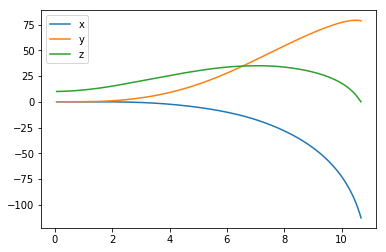

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

In [4]:
max(results['z'])

35.01866205448263

The next code cell visualizes the velocity of the quadcopter.

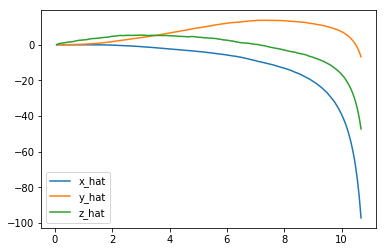

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

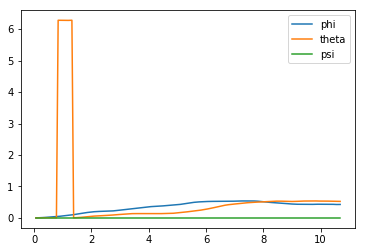

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

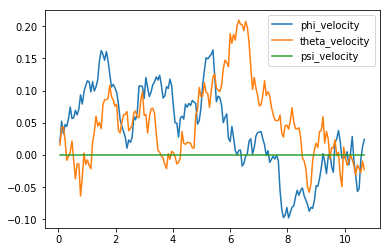

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

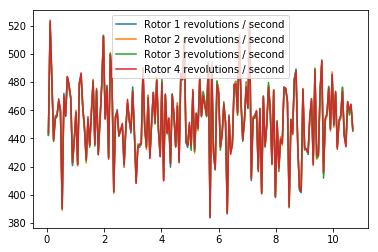

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-112.86115038   78.67700078    0.            0.42787046    0.52535114
    0.        ]
[-97.095846    -6.76625439 -47.20985678]
[ 0.02422765 -0.0227846   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 500
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()


Episode =  500, score =   0.205 (best =   0.249), noise_scale = 3.25

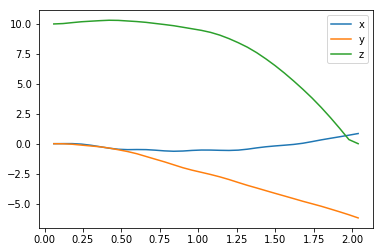

In [11]:
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

state = agent.reset_episode()
total_reward = 0
reward_list = []
while True:
    rotor_speeds = agent.act(state)
    next_state, reward, done = task.step(rotor_speeds)
    total_reward += reward
    reward_list.append( total_reward)
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
    for ii in range(len(labels)):
        results[labels[ii]].append(to_write[ii])
    if done:
        break
    state = next_state
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [12]:
## Train agent here. 
## Trying to train for take-off (a height gain from 10m to 30m, starting at 10m instead of ground 
# to allow margin or error since hitting the ground ends episode immediately)
import csv
import numpy as np
from task import Task
from agents.agent import DDPG

# Modify the values below to give the quadcopter a different starting position.
runtime = 20.                                    # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

#add target pose
target_position = np.array([0., 0., 20]) #  (velocity at target position not specified)

# Setup training
task = Task(init_pose, init_velocities, init_angle_velocities, runtime , target_pos = target_position )
agent = DDPG(task)

/home/thojo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
from collections import deque
def train_for_task( agent, task, num_episodes=60):
    deck = deque(maxlen=50)
    total_rewards =[] 
    end_times =[]
    highest_reward = -float('Inf')
    lowest_reward = float('Inf')
    max_heights =[]
    for i_episode in range( num_episodes ):
        total_reward = 0
        episode_largest = -float('Inf')
        episode_smallest = float('Inf')
        max_h = -float('Inf')
        state = agent.reset_episode() # start a new episode

        while True:        
            action = agent.act(state) # The rotor speeds 
            next_state, reward, done = task.step(action)
#             print('R={:4.2f},t={:3.2f},(x,y,x)=({:4.2f},{:4.2f},{:4.2f}), (u,v,w)=({:4.2f},{:4.2f},{:4.2f})'.format(
#             reward,task.sim.time,task.sim.pose[0],task.sim.pose[1],task.sim.pose[2],task.sim.v[0],task.sim.v[1],task.sim.v[2]))
            max_h  = max( task.sim.pose[2], max_h )
            if done:
                failure = (task.sim.time < task.sim.runtime) #more natural to define failure
                if failure:
                    deck.append(0)
                    reward = -5 #keeping all other rewards between -1 and +1, negative reward for early termination
                else:
                    deck.append(1) #change this to provide rewards when goal is attained (instead of just not crashing out)
            agent.step(action, reward, next_state, done)
            state = next_state
            total_reward += reward
            episode_largest = max(episode_largest, reward)
            episode_smallest = min( episode_smallest, reward)
            if done:
                highest_reward = max( total_reward, highest_reward )
                lowest_reward = min( total_reward, lowest_reward )
                total_rewards.append( total_reward )
                max_heights.append( max_h )
                end_times.append(task.sim.time)
                print("\rEp={:4d},suc={:d} T_e={:4.2f}, EpR={:4.1f}, maxEpR = {:4.1f}, minEpR = {:4.1f}, min/maxR thisEp = {:4.1f} / {:4.1f} ".format(i_episode, 1-failure, task.sim.time, total_rewards[i_episode-1], highest_reward, lowest_reward, episode_smallest, episode_largest), end="")  # [debug]
                break
        sys.stdout.flush()
    training = dict()
    training[ 'deck' ] = deck
    training[ 'total_rewards' ] = total_rewards
    training[ 'end_times' ] = end_times
    training[ 'max_heights' ] = max_heights
    training[ 'achieved' ] = 0
    if sum(deck) > 10:
            training[ 'achieved' ] = 1 
            return agent, training  #stop training if you've been successful in a few recent attempts
    return agent, training #this shows that the agent never made it to the target

In [14]:
agent, training = train_for_task( agent, task, num_episodes=1500)

Ep=1499,suc=0 T_e=1.56, EpR=-7.7, maxEpR = -7.6, minEpR = -10.9, min/maxR thisEp = -5.0 /  0.0  

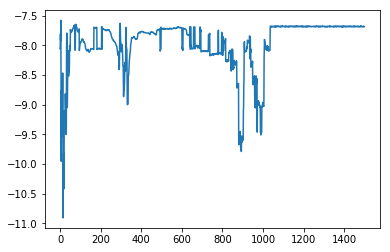

In [15]:
#total rewards during learning
plt.plot(training[ 'total_rewards' ]) 

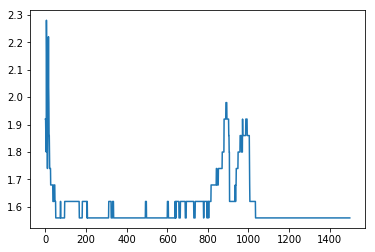

In [16]:
plt.plot(training[ 'end_times' ] ) 

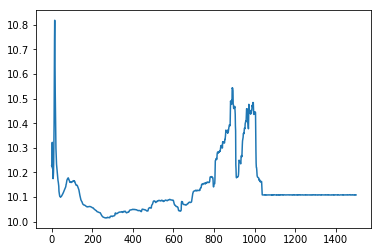

In [17]:
plt.plot(training[ 'max_heights'])

In [18]:
sum(training['deck'])

0

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [19]:
# Run the simulation once more, and save the results for plotting
# file_output = 'DDPGdata.txt'     # file name for saved results
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

state = agent.reset_episode()
total_reward = 0
reward_list = []
reward_cumul =[]
while True:
    rotor_speeds = agent.act(state)
    next_state, reward, done = task.step(rotor_speeds)
    print('R={:4.2f},t={:3.2f},(x,y,z)=({:4.2f},{:4.2f},{:4.2f}), (u,v,w)=({:4.2f},{:4.2f},{:4.2f})'.format(
    reward,task.sim.time,task.sim.pose[0],task.sim.pose[1],task.sim.pose[2],task.sim.v[0],task.sim.v[1],task.sim.v[2]))

    total_reward += reward
    reward_list.append( reward)
    reward_cumul.append( total_reward)
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
    for ii in range(len(labels)):
        results[labels[ii]].append(to_write[ii])
    if done:
        break
    state = next_state

R=0.02,t=0.06,(x,y,z)=(-0.00,-0.00,10.02), (u,v,w)=(-0.04,-0.07,0.58)
R=0.02,t=0.12,(x,y,z)=(-0.01,-0.02,10.06), (u,v,w)=(-0.45,-0.65,0.86)
R=0.02,t=0.18,(x,y,z)=(-0.07,-0.08,10.10), (u,v,w)=(-1.43,-1.20,0.30)
R=0.01,t=0.24,(x,y,z)=(-0.19,-0.15,10.11), (u,v,w)=(-2.44,-1.29,0.10)
R=0.00,t=0.30,(x,y,z)=(-0.34,-0.26,10.11), (u,v,w)=(-2.51,-2.26,-0.45)
R=0.00,t=0.36,(x,y,z)=(-0.46,-0.40,10.04), (u,v,w)=(-1.55,-2.39,-1.47)
R=-0.00,t=0.42,(x,y,z)=(-0.53,-0.56,9.94), (u,v,w)=(-0.79,-3.05,-2.30)
R=-0.01,t=0.48,(x,y,z)=(-0.59,-0.74,9.75), (u,v,w)=(-1.25,-2.84,-3.64)
R=-0.02,t=0.54,(x,y,z)=(-0.69,-0.91,9.52), (u,v,w)=(-2.27,-2.89,-4.43)
R=-0.04,t=0.60,(x,y,z)=(-0.84,-1.07,9.21), (u,v,w)=(-2.45,-2.30,-5.78)
R=-0.04,t=0.66,(x,y,z)=(-0.96,-1.19,8.85), (u,v,w)=(-1.53,-1.92,-6.21)
R=-0.05,t=0.72,(x,y,z)=(-1.03,-1.30,8.45), (u,v,w)=(-0.83,-1.27,-7.06)
R=-0.07,t=0.78,(x,y,z)=(-1.09,-1.36,8.02), (u,v,w)=(-1.31,-0.92,-7.04)
R=-0.09,t=0.84,(x,y,z)=(-1.20,-1.41,7.58), (u,v,w)=(-2.32,-0.73,-7.58)
R=-0.11,t=

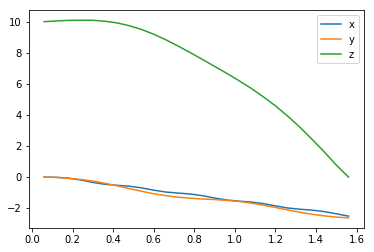

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

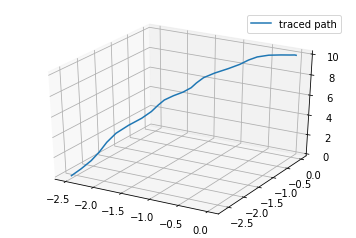

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(results['x'], results['y'], results['z'], label='traced path')
ax.legend()

plt.show()

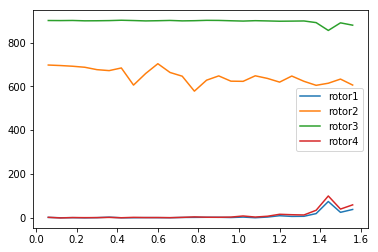

In [22]:
plt.plot(results['time'], results['rotor_speed1'], label='rotor1')
plt.plot(results['time'], results['rotor_speed2'], label='rotor2')
plt.plot(results['time'], results['rotor_speed3'], label='rotor3')
plt.plot(results['time'], results['rotor_speed4'], label='rotor4')
plt.legend()
_ = plt.ylim()

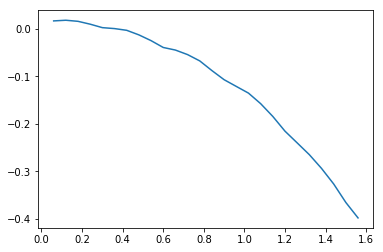

In [23]:
#rewards in the last run (single episode)
plt.plot( results['time'], reward_list, label = 'rewards' )

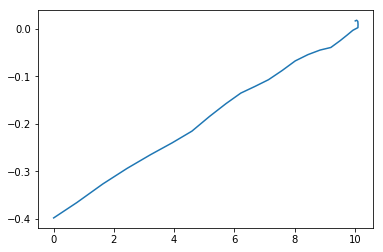

In [24]:
#plot z
plt.plot( results['z'], reward_list, label = ' rewards against z' )

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I specified take-off.  I wanted the copter to go from (0,0,10) to (0,0,30).  I tried a number of terms (although using only 2 or 3 at a time).  The final one shown in task.py uses 4 pieces:
-  A constant reward for keeping going (positive)
-  A reward that penalizes distance from the target position (reward_l1, negative)
-  Two large rewards for getting close to the target - one for getting close to the z-value of the target and an even larger one if the agent can then also get into a certain x-y distance of the target (both positive)
-  Finally, a reward that's positive for z-values between the initial position and the target and negative otherwise (to help prevent overshooting)


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
I worked off of the algorithms that were provided to us, namely the DDPG agent which uses the actor and critic classes.  

As for hyperparameters, I used $\alpha=0.01$, $\gamma=0.9$ (also tried $\gamma=0.99$, similar result). I set the learning rate of the Adam optimizers to 0.001.

I modified the neural networks in the given actor and critic classes. I've added more layers to them.  Seeing that the computation was taking a lot of time, I reduced the number of hidden units in them, preferring to make them deeper instead.  The number of hidden units was  (32,64,32) for the actor {also tried (16,32,16) as well as just two layers (16,32)}.  For the critic classes, it is (32,64) for states as well as for actions in the case of the critic class. The final network combining states and actions then got more dense layers (32,64,32) {I also tried 1 and 2 layers here}.  There is batch normalization, relu activation and dropout ( 40% dropout) added in each layer. 

I have also added kernel initialization and kernel regularization.

Since it seemed that the main challenge in learning here is with reward, I decided to limit the exploration with these other hyperparameters.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
This was a very hard task.  I have spent an enormous amount of time and the best I could see happening is that the agent is learning.  I haven't been able to guide it to target consistently.  At first, the quadcopter was imply crashing to the ground under gravity. The first improvements happened (as I have been changing the reward) in terms of just taking longer to crash (several seconds instead of the 1.43 seconds that we know from the physics if it simply plunged to the ground).  Then there were jumps up, fast flights overshooting the target and hitting the top of the bounding box etc. I could tell that the agents was learning by looking at the amount of time taken, the max height reached. But I haven't yet been able to make it do the exact task I wanted.

On Slack, most questions I wanted to ask have already been asked.  I was able to understand from my classmates and forum mentors what I needed to do, but could not figure out how to get it to work anymore than what I got. 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The first hardest part was simply knowing what to do with the project.  Unlike every other project in this nanodegree, the instructions on how to structure the project were minimal and while I am sure I undestand the material taught, that was not easy to know what to do for the project.

The second hardest part is getting it to learn anything or do anything other than crashing , why is it not responding to the rewards. While I have seen the agent do other things - such as rising up to the target (and then falling straight down) or overshooting the target, most of the hyperparameters result either in free fall or just a slightly slower fall.  

Among further improvements:
-  Foremost would be to get the quadcopter to consistently proceed towards the goal. My intuition would be to try to guide to to stay within a certain tube around the path from the initial position to the target.  But there were many comments on Slack suggesting to keep the reward function simple.
-  Getting the agent to not overshoot
-  Ending the learning process after reaching the target.  This seems important just by looking at the rewards plot.
-  Saving the best learned weights and using them would be another way to do this.
